# HW 4

In [ ]:
# Importing libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Loading dataset and creating pandas dataframe

In [82]:
data = pd.read_csv('diamonds_500.csv')

In [83]:
data.head()

,carat,cut,depth,price,x,y,z
0,1.00,Very Good,63.5,3858,6.37,6.32,4.03
1,1.02,Very Good,61.6,4291,6.46,6.47,3.98
2,1.25,Premium,62.0,8099,6.88,6.84,4.25
3,0.80,Very Good,61.9,3737,5.93,5.96,3.69
4,0.91,Good,59.9,4309,6.18,6.24,3.72


This dataset has 1 nominal feature (cut). We consider next features : 
* price
* cut
* depth

- look on histogram of features 'price' and 'depth'

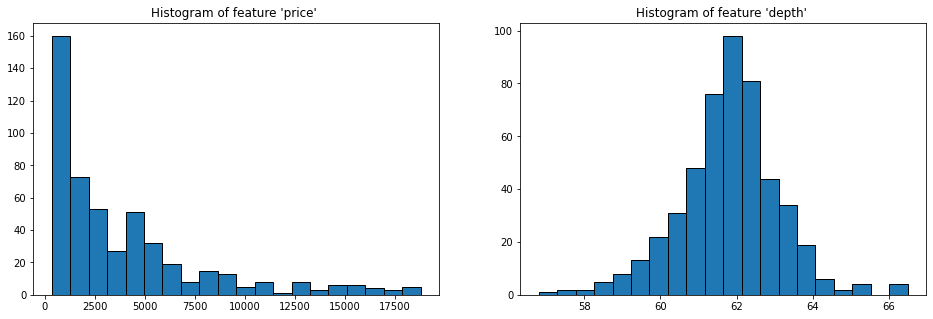

In [84]:
fig, ax = plt.subplots(ncols=2, figsize = (16,5))
ax[0].hist(data['price'], bins = 20, edgecolor='black')
ax[0].set_title("Histogram of feature 'price' ")
ax[1].hist(data['depth'], bins = 20, edgecolor='black')
ax[1].set_title("Histogram of feature 'depth' ");

plt.savefig('price_depth_hist.png')

- Look on range of price and depth features.

In [85]:
print('Range price feature : [', data['price'].min() , ', ', data['price'].max() , ']')
print('Range depth feature : [', data['depth'].min() , ', ', data['depth'].max() , ']')

Range price feature : [ 337 ,  18784 ]
Range depth feature : [ 56.8 ,  66.5 ]


[0, 2500), [2500, 7500), [7500, 12500) [12500, 20000] and [0, 61), [61, 63), [64, 66.5] boundaries is used to categorize 'price' and 'depth' features.<p>
 After categorizing selected features, we get new features 'price_categorize' (3 category) and 'depth_categorize' (3 category). Feature 'cut' include 3 category.

### Categorizing selected features

In [86]:
boundary_carat = [0, 2500, 10000, 20000]
boundary_depth = [0, 61, 63, 66.5]

data['price_categorize'] = pd.cut(data['price'], boundary_carat)
data['depth_categorize'] = pd.cut(data['depth'], boundary_depth)

In [87]:
def contingency_table(data, value, index, columns):
    
    # Build pivot table
    pivot_table = pd.pivot_table(data, value, 
                                 index = index, 
                                 columns = columns, 
                                 aggfunc = 'count',
                                fill_value = 0)
    
    # Get sum (all, rows, cols)
    count_elemnts = pivot_table.sum().sum()
    sum_by_row = pivot_table.sum(axis = 1)
    sum_by_col = pivot_table.sum(axis = 0)
    
    # Compute probabitilites table
    prob_table = (pivot_table/count_elemnts)
    
    # Compute marginal probabilities table
    marginal_table = pivot_table.copy()
    
    for col in marginal_table.columns:
        marginal_table[col] = marginal_table[col] / sum_by_col[col]
    
    return (pivot_table, prob_table, marginal_table)

In [88]:
tables_price_cut = contingency_table(data, 'carat', 'price_categorize', 'cut')

In [89]:
tables_price_depth = contingency_table(data, 'carat', 'price_categorize', 'depth_categorize')

### Considering on contingency tables

In [90]:
tables_price_cut[0]

cut,Fair,Good,Ideal,Premium,Very Good
price_categorize,,,,,
"(0, 2500]",5,21,113,56,59
"(2500, 10000]",6,26,51,59,56
"(10000, 20000]",0,4,20,15,9


In [91]:
tables_price_depth[0]

depth_categorize,"(0.0, 61.0]","(61.0, 63.0]","(63.0, 66.5]"
price_categorize,,,
"(0, 2500]",56,169,29
"(2500, 10000]",47,109,42
"(10000, 20000]",15,27,6


### Considering Relative Frequency Tables cut ->carat and cut->depth

In [92]:
tables_price_cut[1]

cut,Fair,Good,Ideal,Premium,Very Good
price_categorize,,,,,
"(0, 2500]",0.010,0.042,0.226,0.112,0.118
"(2500, 10000]",0.012,0.052,0.102,0.118,0.112
"(10000, 20000]",0.000,0.008,0.040,0.030,0.018


In [93]:
tables_price_depth[1]

depth_categorize,"(0.0, 61.0]","(61.0, 63.0]","(63.0, 66.5]"
price_categorize,,,
"(0, 2500]",0.112,0.338,0.058
"(2500, 10000]",0.094,0.218,0.084
"(10000, 20000]",0.030,0.054,0.012


# Considering Conditional Frequency Table carat -> cut

In [94]:
tables_price_cut[2]

cut,Fair,Good,Ideal,Premium,Very Good
price_categorize,,,,,
"(0, 2500]",0.454545,0.411765,0.614130,0.430769,0.475806
"(2500, 10000]",0.545455,0.509804,0.277174,0.453846,0.451613
"(10000, 20000]",0.000000,0.078431,0.108696,0.115385,0.072581


* P(Fair  $\rightarrow $ (2500, 10000]) = 0.55 $ \rightarrow $ Price Fair cut diomonds commonly is from 2500 to 10000
* P(Ideal $ \rightarrow $ (0, 2500]) = 0.61 $ \rightarrow $ Price ideal cut diomonds commonly is from 0 to 2500. this anomaly can be becouse our data set contain random subset from original data set

In [95]:
tables_price_depth[2]

depth_categorize,"(0.0, 61.0]","(61.0, 63.0]","(63.0, 66.5]"
price_categorize,,,
"(0, 2500]",0.474576,0.554098,0.376623
"(2500, 10000]",0.398305,0.357377,0.545455
"(10000, 20000]",0.127119,0.088525,0.077922


* P((61, 63] $ \rightarrow $ (0, 2500]) = 0.55 $ \rightarrow $ Price diamond with depth from 61 to 63 is commonly is from 0 to 2500.
* P((63, 66.5] $ \rightarrow $ (2500, 10000] = 0.55 $ \rightarrow $ Price diamond  with depth from 63 to 66.5 is commonly us from 2500, 10000.

### Qualet index

In [96]:
def quetelet_index(relative_table):
    new_table = relative_table.copy()
    
    # Auxiliary data to compute quetelet index
    for col in new_table.columns:
        sum_col = new_table[col].sum()
        new_table[col] = [sum_col / new_table.shape[0]]*new_table.shape[0]
    
    # Compute quetelet index
    new_table = np.divide(relative_table , new_table) - 1
    new_table = new_table.round(2)
    
    return new_table

In [97]:
quetelet_index_price_cut = quetelet_index(tables_price_cut[1])
quetelet_index_price_cut

cut,Fair,Good,Ideal,Premium,Very Good
price_categorize,,,,,
"(0, 2500]",0.36,0.24,0.84,0.29,0.43
"(2500, 10000]",0.64,0.53,-0.17,0.36,0.35
"(10000, 20000]",-1.00,-0.76,-0.67,-0.65,-0.78


In [98]:
quetelet_index_price_depth = quetelet_index(tables_price_depth[1])
quetelet_index_price_depth

depth_categorize,"(0.0, 61.0]","(61.0, 63.0]","(63.0, 66.5]"
price_categorize,,,
"(0, 2500]",0.42,0.66,0.13
"(2500, 10000]",0.19,0.07,0.64
"(10000, 20000]",-0.62,-0.73,-0.77


### chi2

In [99]:
def classical_method_chi2(rev_table):
    new_table = rev_table.copy()
    
    # Information to compute chi2 statistic
    for col in new_table.columns:
        sum_col = new_table[col].sum()
        new_table[col] = [sum_col / new_table.shape[0]]*new_table.shape[0]
    new_table = (rev_table - new_table)**2 / new_table
    
    return (new_table, new_table.sum().sum())

In [100]:
chi2_price_cut = classical_method_chi2(tables_price_cut[1])

In [101]:
chi2_price_cut[0]

cut,Fair,Good,Ideal,Premium,Very Good
price_categorize,,,,,
"(0, 2500]",0.000970,0.001882,0.087047,0.007405,0.015102
"(2500, 10000]",0.002970,0.009529,0.003482,0.011328,0.010409
"(10000, 20000]",0.007333,0.019882,0.055710,0.037051,0.050586


In [102]:
print('Sum value in table cut -> price: ', round(chi2_price_cut[1], 4))

Sum value in table cut -> price:  0.3207


There are not value greater than 0.1

In [103]:
chi2_price_depth = classical_method_chi2(tables_price_depth[1])

In [104]:
chi2_price_depth[0]

depth_categorize,"(0.0, 61.0]","(61.0, 63.0]","(63.0, 66.5]"
price_categorize,,,
"(0, 2500]",0.014124,0.089189,0.000866
"(2500, 10000]",0.002989,0.001058,0.020788
"(10000, 20000]",0.030107,0.109674,0.030139


In [105]:
print('Sum value in table depth -> price: ', round(chi2_price_depth[1], 4))

Sum value in table depth -> price:  0.2989


There are value in table greater than 0.1. It is (61.0, 63.0] $ \rightarrow $ (10000, 20000].

### average Quetelet

In [106]:
def averange_quetelet_index(rev_table, index_q):
    # Trick to compute av quetelet index
    avg = rev_table * index_q
    return avg

In [107]:
averange_quetelet_price_cut = averange_quetelet_index(tables_price_cut[1], quetelet_index_price_cut)
averange_quetelet_price_cut

cut,Fair,Good,Ideal,Premium,Very Good
price_categorize,,,,,
"(0, 2500]",0.00360,0.01008,0.18984,0.03248,0.05074
"(2500, 10000]",0.00768,0.02756,-0.01734,0.04248,0.03920
"(10000, 20000]",-0.00000,-0.00608,-0.02680,-0.01950,-0.01404


In [108]:
print('Sum value in table cut -> price :', averange_quetelet_price_cut.sum().sum())

Sum value in table cut -> price : 0.31989999999999996


The highlighted entries are those most contributing to the change:
* ideal -> (0, 2500] (20 %)

In [55]:
averange_quetelet_price_depth = averange_quetelet_index(tables_price_depth[1], quetelet_index_price_depth)
averange_quetelet_price_depth

depth_categorize,"(0.0, 61.0]","(61.0, 63.0]","(63.0, 66.5]"
price_categorize,,,
"(0, 2500]",0.04704,0.22308,0.00754
"(2500, 10000]",0.01786,0.01526,0.05376
"(10000, 20000]",-0.01860,-0.03942,-0.00924


In [56]:
print('Sum value in table depth -> price :', averange_quetelet_price_depth.sum().sum())

Sum value in table depth -> price : 0.29728000000000004


The highlighted entries are those most contributing to the change:
* (61, 63] -> (0, 2500] (23 %)

# Counting numbers of observations would suffice to see the features as associated at 95% confidence level; 99% confidence level

* deegre freedom of depth -> price table = 4*2 = 8
* deegre freedom of cut -> price table = 2*2 = 4

Find t-value for 95% probability and 99% probability for depth -> price and cut -> price tables using scipy.

In [492]:
from scipy.stats import chi2
print('t_value depth -> price for 95% probability :', round(chi2(8).ppf(0.95), 2))
print('t_value depth -> price for 99% probability :', round(chi2(8).ppf(0.99), 2))
print('t_value cut -> price for 95 probability :', round(chi2(4).ppf(0.95), 2))
print('t_value cut -> price for 99 probability :', round(chi2(4).ppf(0.99), 2))

t_value depth -> price for 95% probability : 15.51
t_value depth -> price for 99% probability : 20.09
t_value cut -> price for 95 probability : 9.49
t_value cut -> price for 99 probability : 13.28


* n*t > $ \chi  ^ 2$
* n > $ \chi  ^ 2 $ / t
* $ n_{depth -> price, 0.95} > \chi_{0.95} ^ 2 / t_{0.95} = 15.51/0.2989 > 52$ That means that at any N>52 the hypothesis of statistical independence should be rejected at 95% confidence level.
* $ n_{depth -> price, 0.99} > \chi_{0.99} ^ 2 / t_{0.99} = 15.51/0.2989 > 68$ That means that at any N>68 the hypothesis of statistical independence should be rejected at 99% confidence level.
* $ n_{cut -> price, 0.95} > \chi_{0.95} ^ 2 / t_{0.95} = 9.49/0.3207 > 30$ That means that at any N>30 the hypothesis of statistical independence should be rejected at 95% confidence level.
* $ n_{cut -> price, 0.95} > \chi_{0.95} ^ 2 / t_{0.95} = 13.28/0.3207 > 42$ That means that at any N>42 the hypothesis of statistical independence should be rejected at 99% confidence level.

# Visualization

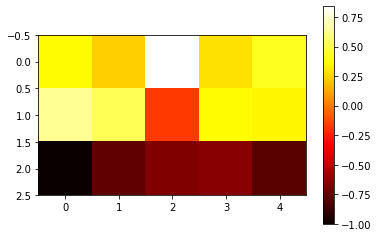

In [495]:
plt.imshow(qualet_index_price_cut, cmap='hot', 
           interpolation='nearest')
plt.colorbar()
plt.show()

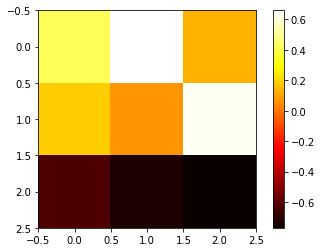

In [496]:
plt.imshow(qualet_index_price_depth, cmap='hot', 
           interpolation='nearest')
plt.colorbar()
plt.show()